In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

path = '/content/drive/MyDrive/Training'
files = os.listdir(path)
classes = {'no_tumor': 0, 'pituitary_tumor': 1}


In [ ]:
import cv2
import os

X = []
Y = []
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

for cls in classes:
    pth = '/content/drive/MyDrive/Training/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])


In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
pd.Series(Y).value_counts()

1    827
0    365
dtype: int64

In [ ]:
X.shape

(1192, 200, 200)

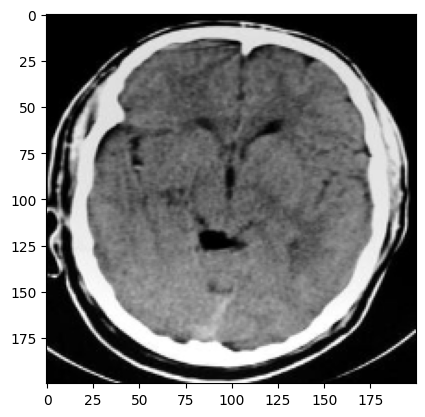

In [ ]:
plt.imshow(X[0], cmap='gray')

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1192, 40000)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

((953, 40000), (239, 40000))

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
pca_train = xtrain
pca_test = xtest

(953, 40000) (239, 40000)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [ ]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [ ]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [ ]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9539748953974896


In [ ]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9926547743966422
Testing Score: 0.9623430962343096


In [ ]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([  6,  49,  65,  71,  73, 171, 182, 187, 227]),)

In [ ]:
pred[36]

In [ ]:
ytest[36]

1

In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

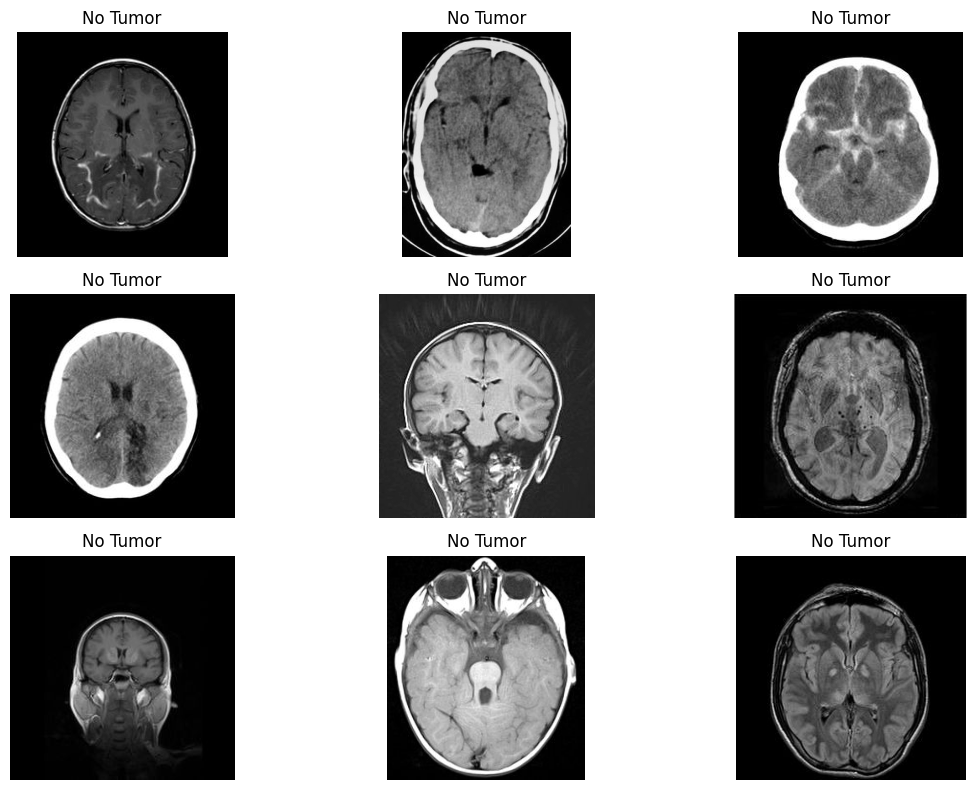

In [ ]:
plt.figure(figsize=(12, 8))
p = os.listdir('/content/drive/MyDrive/Testing/')
c = 1

for i in os.listdir('/content/drive/MyDrive/Testing/no_tumor/')[:9]:
    plt.subplot(3, 3, c)

    img = cv2.imread('/content/drive/MyDrive/Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

plt.tight_layout()
plt.show()

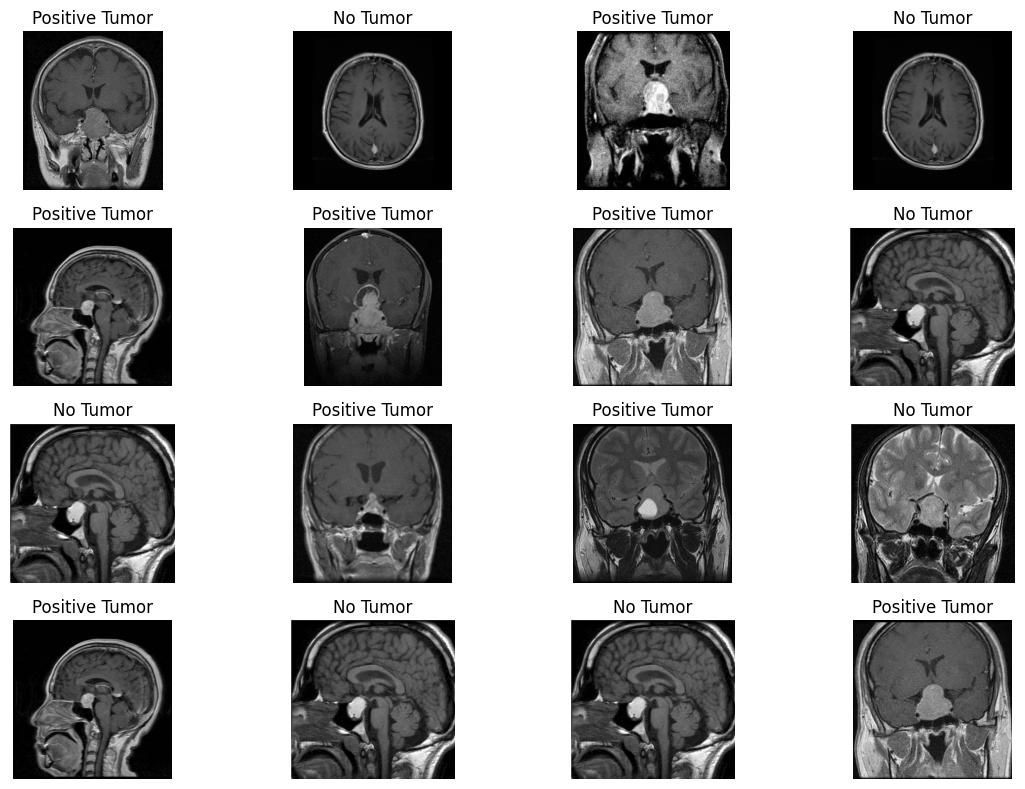

In [ ]:
plt.figure(figsize=(12, 8))
p = os.listdir('/content/drive/MyDrive/Testing/')
c = 1

for i in os.listdir('/content/drive/MyDrive/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4, 4, c)

    img = cv2.imread('/content/drive/MyDrive/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

plt.tight_layout()
plt.show()